In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Loading your dataset
data = pd.read_csv("/content/Cleaned_data.csv")

In [31]:
# Selecting relevant features and target variable
X = data[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Daily Steps']]
y = data['Blood_Pressure_Category']  # Target variable

In [32]:
# Spliting data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [33]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Initializing Naive Bayes classifier
model = GaussianNB()

In [35]:
# Training the classifier
model.fit(X_train, y_train)

GaussianNB()

In [36]:
# Predicting on the testing set
y_pred = model.predict(X_test)

In [42]:
X_test

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Daily Steps
158,39,7.2,8,60,5,8000
451,35,7.2,8,60,4,7000
55,32,6.0,6,30,8,5000
247,44,6.8,7,45,7,5000
70,33,6.1,6,30,8,5000
...,...,...,...,...,...,...
11,29,7.8,7,75,6,8000
374,29,7.8,7,75,6,8000
22,30,7.7,7,75,6,8000
381,29,6.0,6,30,8,8000


In [43]:
X_train

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Daily Steps
182,42,7.8,8,90,5,8000
89,35,7.3,8,60,4,5000
185,42,6.8,6,45,7,5000
148,39,6.9,7,50,6,5500
204,43,7.6,8,75,4,6800
...,...,...,...,...,...,...
71,33,6.1,6,30,8,5000
106,37,6.1,6,42,6,4200
270,49,6.1,6,90,8,10000
435,33,6.2,6,50,6,5500


In [45]:
y_test

158    Hypertension Stage 1
451                  Normal
55     Hypertension Stage 1
247    Hypertension Stage 1
70     Hypertension Stage 1
               ...         
11     Hypertension Stage 1
374    Hypertension Stage 1
22     Hypertension Stage 1
381    Hypertension Stage 1
373    Hypertension Stage 2
Name: Blood_Pressure_Category, Length: 112, dtype: object

In [44]:
y_train

182    Hypertension Stage 1
89     Hypertension Stage 1
185    Hypertension Stage 1
148    Hypertension Stage 1
204    Hypertension Stage 1
               ...         
71     Hypertension Stage 1
106    Hypertension Stage 1
270    Hypertension Stage 2
435    Hypertension Stage 1
102                  Normal
Name: Blood_Pressure_Category, Length: 447, dtype: object

In [37]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8392857142857143


In [38]:

# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[77  0 16]
 [ 2  7  0]
 [ 0  0 10]]


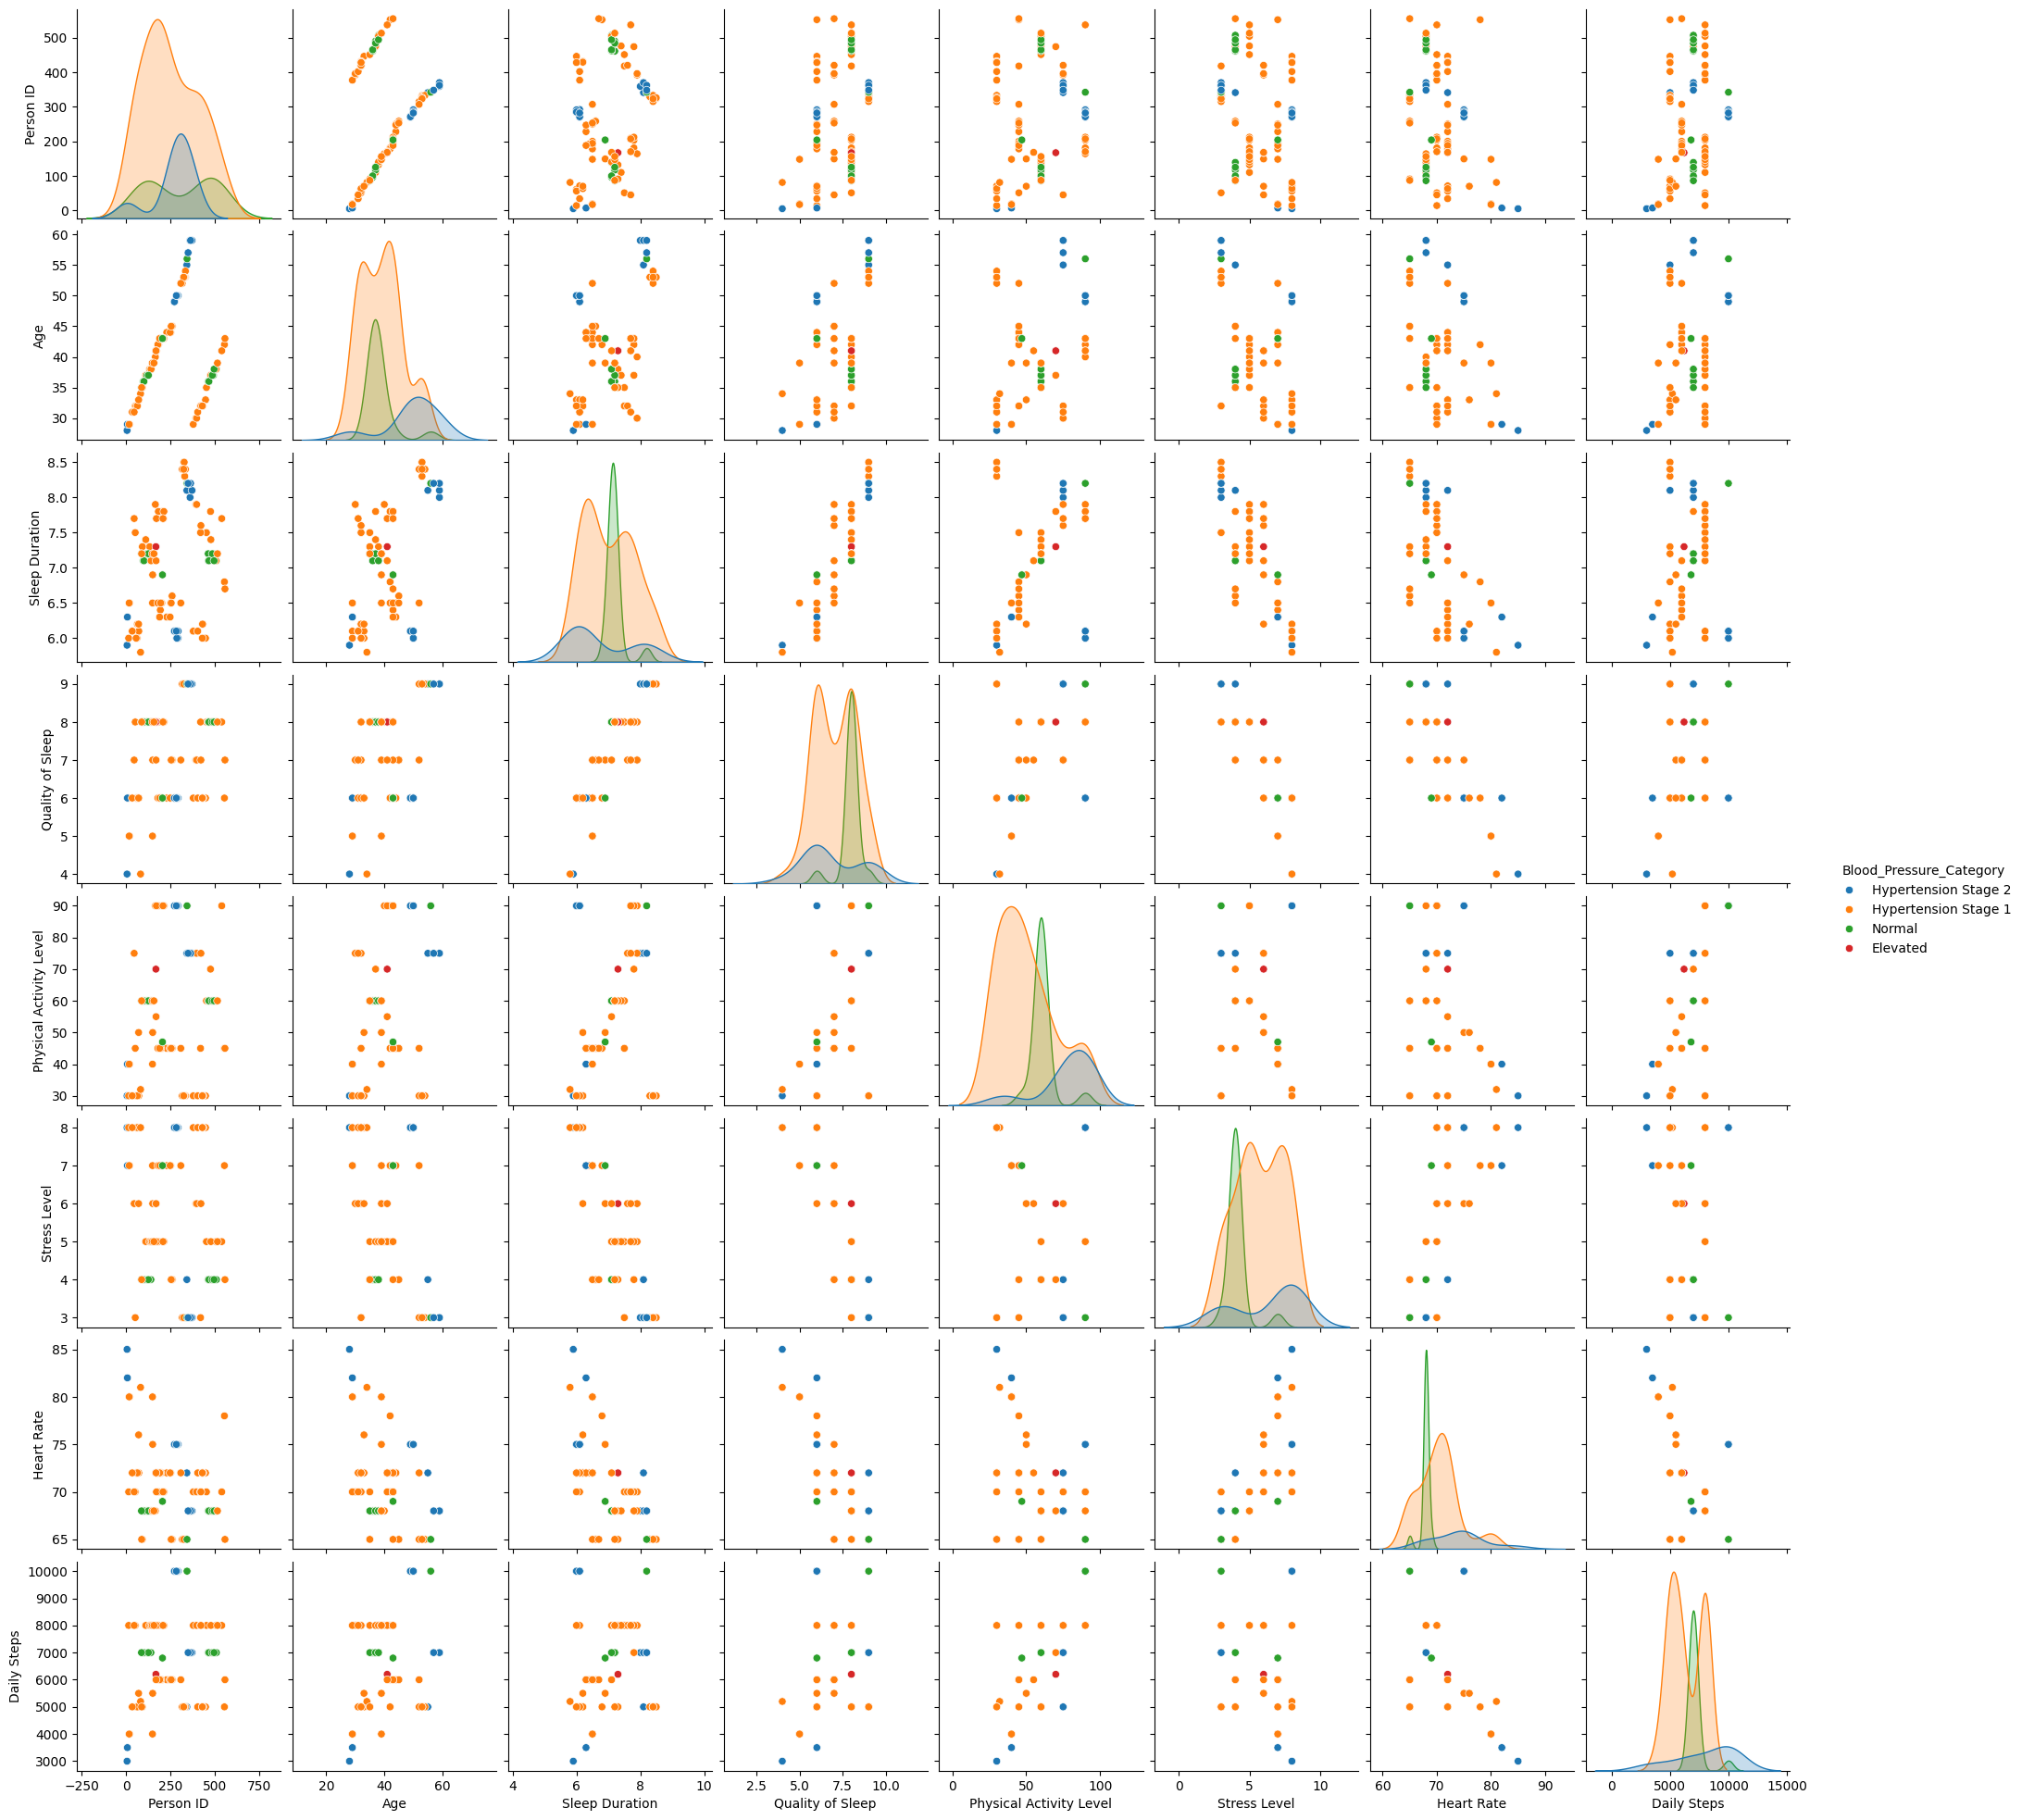

In [41]:
sample_data = data.sample(n=100)
sns.pairplot(sample_data, hue='Blood_Pressure_Category', diag_kind='kde')
plt.show()